This notebook shows how to connect to a local mongodb database, query a collection, and visualize the result using matplotlib.

In [2]:
! pip install pymongo

In [3]:
from pymongo import MongoClient
import pandas as pd

# connect to local mongodb database

MONGO_HOST='mongodb://localhost:27017/tweets'

client=MongoClient(MONGO_HOST)

#select tweets database

db=client['tweets']                

In [4]:
result=db.vaccine_tweets.find({"$text": 
    {"$search": "Biden Mask"}
},
    {"text":1,
    "created_at":1,
    "_id":0
})

for i in range(5):
    print(result[i]['text'])

@POTUS Where is Biden? #biden #kayleighmcenany
RT @naretevduorp: The biggest difference between Obama/Biden and Biden/Harris . . .

Biden/Harris is better at celebrating success.

But th…
RT @naretevduorp: The biggest difference between Obama/Biden and Biden/Harris . . .

Biden/Harris is better at celebrating success.

But th…
RT @naretevduorp: The biggest difference between Obama/Biden and Biden/Harris . . .

Biden/Harris is better at celebrating success.

But th…
RT @naretevduorp: The biggest difference between Obama/Biden and Biden/Harris . . .

Biden/Harris is better at celebrating success.

But th…


In [5]:
# display top 10 hashtags

pipeline=[
    {"$addFields": {"textArray": {"$split": ["$text", " "]}}},
    {"$unwind": "$textArray"},
    {"$addFields": {"textArray": {"$toLower": "$textArray"}}},
    {"$match": {"textArray": {"$regex":"^#"}}},
    {"$match": {"textArray": {"$nin": ["#covid19", "#cov…", "#vaccine", "#coronavirus"]}}},
    {"$group": {
        "_id": "$textArray",
        "frequency": {"$sum":1}
    }},
    {"$sort": {"frequency":-1}},
    {"$limit":10}
]

result=db.vaccine_tweets.aggregate(pipeline)

for res in result:
    print(res)

{'_id': '#covid', 'frequency': 96}
{'_id': '#vaccinepassport', 'frequency': 88}
{'_id': '#southparq', 'frequency': 82}
{'_id': '#oxfordvaccine\n#pf…', 'frequency': 52}
{'_id': '#capitolriot/#insurrection,', 'frequency': 49}
{'_id': '#rondesantis', 'frequency': 49}
{'_id': '#covid-19', 'frequency': 47}
{'_id': '#lockdown', 'frequency': 39}
{'_id': '#milvax:', 'frequency': 36}
{'_id': '#atmanirbharbharat', 'frequency': 35}


In [7]:
# create a function to display top n hashtags

def topNHashtags(n):
    pipeline=[
    {"$addFields": {"textArray": {"$split": ["$text", " "]}}},
    {"$unwind": "$textArray"},
    {"$addFields": {"textArray": {"$toLower": "$textArray"}}},
    {"$match": {"textArray": {"$regex":"^#"}}},
    {"$match": {"textArray": {"$nin": ["#covid19", "#cov…", "#vaccine", "#coronavirus"]}}},
    {"$group": {
        "_id": "$textArray",
        "frequency": {"$sum":1}
    }},
    {"$sort": {"frequency":-1}},
    {"$limit":n}
]

    result=db.vaccine_tweets.aggregate(pipeline)
    result_list=[]

    for res in result:
        #print(res)
        result_list.append(res)
    
    return result_list

In [8]:
result_list=topNHashtags(10)
result_list

[{'_id': '#covid', 'frequency': 96},
 {'_id': '#vaccinepassport', 'frequency': 88},
 {'_id': '#southparq', 'frequency': 82},
 {'_id': '#oxfordvaccine\n#pf…', 'frequency': 52},
 {'_id': '#rondesantis', 'frequency': 49},
 {'_id': '#capitolriot/#insurrection,', 'frequency': 49},
 {'_id': '#covid-19', 'frequency': 47},
 {'_id': '#lockdown', 'frequency': 39},
 {'_id': '#milvax:', 'frequency': 36},
 {'_id': '#atmanirbharbharat', 'frequency': 35}]

In [9]:
#covert the result to a python data frame
result_pd=pd.DataFrame(list(result_list))
result_pd

,_id,frequency
0,#covid,96
1,#vaccinepassport,88
2,#southparq,82
3,#oxfordvaccine\n#pf…,52
4,#rondesantis,49
5,"#capitolriot/#insurrection,",49
6,#covid-19,47
7,#lockdown,39
8,#milvax:,36
9,#atmanirbharbharat,35


Text(0.5, 1.0, 'Top 10 Hashtags for Covid-19 Vaccine ')

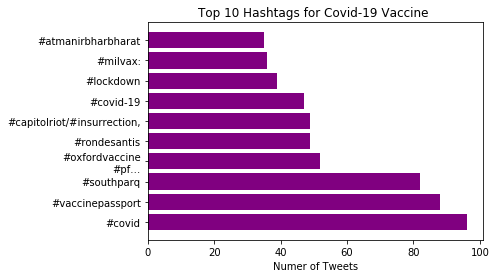

In [10]:
#visualize the result

import matplotlib.pyplot as plt
%matplotlib inline

x=result_pd['_id']
y=result_pd['frequency']

plt.barh(x,y, color="purple")
plt.xlabel("Numer of Tweets")
plt.title("Top 10 Hashtags for Covid-19 Vaccine ")